In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('Offenses_Known_to_Law_Enforcement_by_State_by_City_2013.csv', header=None)
df = df[3:]
df = df.rename(columns=df.iloc[0])
df = df[1:]
df['State']
df.head()

,State,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3,nan,nan,nan
4,ALABAMA,Abbeville,2.645,11,1,1,NaN,2,7,63,21,39,3,NaN,NaN,NaN,NaN
5,NaN,Adamsville,4.481,19,1,0,NaN,7,11,321,58,252,11,NaN,NaN,NaN,
6,NaN,Addison,744,1,0,1,NaN,0,0,25,6,17,2,NaN,NaN,NaN,
7,NaN,Alabaster,31.170,44,0,2,NaN,11,31,640,70,544,26,NaN,NaN,NaN,NaN
8,NaN,Alexander City,14.692,119,2,16,NaN,12,89,661,121,510,30,NaN,NaN,NaN,NaN


In [3]:
true_states = []
# Clean the NaN results in the column 'State' 
def fixNanStates(states):
    # For each state
    for state in states:
        # If variable is equal to variable, is used to define NaN, in this case, if it is True, It won't be NaN
        if state == state:
            real_state = state
            true_states.append(str(state))
        # If variable is  not equal to variable, is used to define NaN, in this case, if it is True, It will be NaN
        elif state != state:
            state = real_state
            true_states.append(str(state))
            
# Turn data objects into categories, this way the ammount of space used is much less
def objToCat(dataframe, columns):
    for col in columns:
        dataframe[col] = dataframe[col].astype('category')

        
def spread(series):
    return series.max() - series.min()

In [4]:
states = df['State']
fixNanStates(states)            
df['State'] = true_states


In [5]:
df.columns = df.columns.str.replace('\n',' ')
df = df.loc[:, 'State': 'Motor vehicle theft']

In [6]:
df.head(2)

,State,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft
4,ALABAMA,Abbeville,2.645,11,1,1,NaN,2,7,63,21,39,3
5,ALABAMA,Adamsville,4.481,19,1,0,NaN,7,11,321,58,252,11


In [7]:
df.describe()

,State,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft
count,9302,9292,9289,9288,9292,5431,3859,9292,9289,9288,9290,9290,9292
unique,60,7142,7420,629,76,127,107,348,496,1818,819,1557,497
top,PENNSYLVANIA,Springfield,1.129,0,0,0,0,0,0,0,0,0,0
freq,853,15,5,1057,7536,2270,1733,3832,1430,192,494,273,1798


In [8]:
usacrime_df = df.loc[: , 'State': 'Motor vehicle theft']
objToCat(usacrime_df, ['State', 'City'])
print(usacrime_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9302 entries, 4 to 9305
Data columns (total 13 columns):
State                                   9302 non-null category
City                                    9292 non-null category
Population                              9289 non-null object
Violent crime                           9288 non-null object
Murder and nonnegligent manslaughter    9292 non-null object
Rape (revised definition)1              5431 non-null object
Rape (legacy definition)2               3859 non-null object
Robbery                                 9292 non-null object
Aggravated assault                      9289 non-null object
Property crime                          9288 non-null object
Burglary                                9290 non-null object
Larceny- theft                          9290 non-null object
Motor vehicle theft                     9292 non-null object
dtypes: category(2), object(11)
memory usage: 1.2+ MB
None


In [9]:
usacrime_df = usacrime_df.set_index(['State', 'City'])
usacrime_df.head()

Population Violent crime  \
State   City                                      
ALABAMA Abbeville           2.645            11   
        Adamsville          4.481            19   
        Addison               744             1   
        Alabaster          31.170            44   
        Alexander City     14.692           119   

                       Murder and nonnegligent manslaughter  \
State   City                                                  
ALABAMA Abbeville                                         1   
        Adamsville                                        1   
        Addison                                           0   
        Alabaster                                         0   
        Alexander City                                    2   

                       Rape (revised definition)1 Rape (legacy definition)2  \
State   City                                                                  
ALABAMA Abbeville                               1                       NaN   
        Adamsville                              0                       NaN   
        Addison                                 1                       NaN   
        Alabaster                               2                       NaN   
        Alexander City                         16                       NaN   

                       Robbery Aggravated assault Property crime Burglary  \
State   City                                                                
ALABAMA Abbeville            2                  7             63       21   
        Adamsville           7                 11            321       58   
        Addison              0                  0             25        6   
        Alabaster           11                 31            640       70   
        Alexander City      12                 89            661      121   

                       Larceny- theft Motor vehicle theft  
State   City                                               
ALABAMA Abbeville                  39                   3  
        Adamsville                252                  11  
        Addison                    17                   2  
        Alabaster                 544                  26  
        Alexander City            510                  30

In [10]:
# Finding the columns the have NaN values
usacrime_df.loc[:, usacrime_df.isnull().any()]

Population  \
State                                              City                        
ALABAMA                                            Abbeville           2.645   
                                                   Adamsville          4.481   
                                                   Addison               744   
                                                   Alabaster          31.170   
                                                   Alexander City     14.692   
                                                   Aliceville          2.419   
                                                   Andalusia           9.079   
                                                   Anniston           22.648   
                                                   Arab                8.295   
                                                   Ardmore             1.304   
                                                   Arley                 353   
                                                   Ashford             2.177   
                                                   Ashland             1.926   
                                                   Ashville            2.239   
                                                   Athens             23.972   
                                                   Atmore             10.099   
                                                   Auburn             57.970   
                                                   Bay Minette         8.398   
                                                   Bear Creek          1.059   
                                                   Bessemer           27.240   
                                                   Birmingham        212.001   
                                                   Blountsville        1.697   
                                                   Brent               4.894   
                                                   Brewton             5.331   
                                                   Bridgeport          2.389   
                                                   Brilliant             892   
                                                   Butler              1.850   
                                                   Camp Hill             995   
                                                   Carbon Hill         1.988   
                                                   Cedar Bluff         1.814   
...                                                                      ...   
WYOMING                                            Jackson             9.918   
                                                   Kemmerer            2.631   
                                                   Lander              7.733   
                                                   Laramie            31.940   
                                                   Lusk                1.548   
                                                   Mills               3.486   
                                                   Moorcroft           1.026   
                                                   Newcastle           3.465   
                                                   Pine Bluffs         1.152   
                                                   Powell              6.304   
                                                   Rawlins             9.081   
                                                   Riverton           11.057   
                                                   Rock Springs       24.405   
                                                   Saratoga            1.656   
                                                   Sheridan           17.776   
                                                   Sundance            1.221   
                                                   Thermopolis         3.023   
                                                   Torrington     

In [11]:
# All of them have some NaN values so time to clean it

# First of, if a 'Rape (revised definition)1' happens then a 'Rape (legacy definition)2' doesn't happen and vice-versa therefore,
# we are getting NaN values when it doesn't happen, so let's just change it to 0 instead of NaN
usacrime_df[['Rape (revised definition)1', 'Rape (legacy definition)2']] = (usacrime_df[['Rape (revised definition)1', 
                                                                                       'Rape (legacy definition)2']].fillna(0))

# Now we delete every row with 4 or more NaN values
usacrime_df = usacrime_df.dropna(thresh=4, axis='rows')

In [12]:
# Way cleaner now as we can see below, still some NaN values still linger
usacrime_df[usacrime_df.isnull().any(axis=1)]

Population Violent crime  \
State    City                                              
ALABAMA  Tallassee5                  4.830           NaN   
FLORIDA  Dunnellon7                  1.750             9   
ILLINOIS Chicago7, 8             2.720.554           NaN   
INDIANA  Sellersburg5                6.150           NaN   
         Shelbyville5               19.159           NaN   
MARYLAND Baltimore City Sheriff        NaN             0   
OHIO     Toledo10                  283.035         2.902   
OREGON   Black Butte                   NaN             0   
         Sunriver                      NaN             2   
UTAH     Bountiful5                 42.976            61   
         Hurricane5                 14.558            14   

                                Murder and nonnegligent manslaughter  \
State    City                                                          
ALABAMA  Tallassee5                                                0   
FLORIDA  Dunnellon7                                                0   
ILLINOIS Chicago7, 8                                             414   
INDIANA  Sellersburg5                                              0   
         Shelbyville5                                              0   
MARYLAND Baltimore City Sheriff                                    0   
OHIO     Toledo10                                                 28   
OREGON   Black Butte                                               0   
         Sunriver                                                  0   
UTAH     Bountiful5                                                0   
         Hurricane5                                                0   

                                Rape (revised definition)1  \
State    City                                                
ALABAMA  Tallassee5                                      0   
FLORIDA  Dunnellon7                                      0   
ILLINOIS Chicago7, 8                                     0   
INDIANA  Sellersburg5                                    0   
         Shelbyville5                                    0   
MARYLAND Baltimore City Sheriff                          0   
OHIO     Toledo10                                      129   
OREGON   Black Butte                                     0   
         Sunriver                                        0   
UTAH     Bountiful5                                     23   
         Hurricane5                                      3   

                                Rape (legacy definition)2 Robbery  \
State    City                                                       
ALABAMA  Tallassee5                                     0       1   
FLORIDA  Dunnellon7                                     0       0   
ILLINOIS Chicago7, 8                                    0  11.815   
INDIANA  Sellersburg5                                   0       3   
         Shelbyville5                                   4       3   
MARYLAND Baltimore City Sheriff                         0       0   
OHIO     Toledo10                                       0     962   
OREGON   Black Butte                                    0       0   
         Sunriver                                       0       0   
UTAH     Bountiful5                                     0      14   
         Hurricane5                                     0       2   

                                Aggravated assault Property crime Burglary  \
State    City                                                                
ALABAMA  Tallassee5                             66            296       86   
FLORIDA  Dunnellon7                              9            NaN       13   
ILLINOIS Chicago7, 8                           NaN         95.908   17.775   
INDIANA  Sellersburg5                          NaN            109       17   
         Shelbyville5                          NaN            448       55   
MARYLAND Baltimore City Sheriff                  0             

In [13]:
# As we see, columns with NaN Population values are not helpfull in the slightest since most of all the columns seem to be 0,
# when this case happens, let's remove the Population rows where Population is NaN and feel the rest with of the NaN values with
# 0 values, so that they don't affect much our dataset
usacrime_df = usacrime_df[pd.notnull(usacrime_df['Population'])]
usacrime_df = usacrime_df.fillna(0)

In [14]:
# And voilla!! A much cleaner dataset, although alot of work is still ahead of us! So buckle up!!
usacrime_df[usacrime_df.isnull().any(axis=1)]

,,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft
State,City,,,,,,,,,,,


In [15]:
# Gonna set the Population as an Index as well, which will turn this dataframe into a multi-indexed daframe
usacrime_df = usacrime_df.set_index(['Population'], append=True)
usacrime_df.columns.name = 'Crimes'
usacrime_df = usacrime_df.sort_index()
usacrime_df.head(5)

Crimes                            Violent crime  \
State   City           Population                 
ALABAMA Abbeville      2.645                 11   
        Adamsville     4.481                 19   
        Addison        744                    1   
        Alabaster      31.170                44   
        Alexander City 14.692               119   

Crimes                            Murder and nonnegligent manslaughter  \
State   City           Population                                        
ALABAMA Abbeville      2.645                                         1   
        Adamsville     4.481                                         1   
        Addison        744                                           0   
        Alabaster      31.170                                        0   
        Alexander City 14.692                                        2   

Crimes                            Rape (revised definition)1  \
State   City           Population                              
ALABAMA Abbeville      2.645                               1   
        Adamsville     4.481                               0   
        Addison        744                                 1   
        Alabaster      31.170                              2   
        Alexander City 14.692                             16   

Crimes                            Rape (legacy definition)2 Robbery  \
State   City           Population                                     
ALABAMA Abbeville      2.645                              0       2   
        Adamsville     4.481                              0       7   
        Addison        744                                0       0   
        Alabaster      31.170                             0      11   
        Alexander City 14.692                             0      12   

Crimes                            Aggravated assault Property crime Burglary  \
State   City           Population                                              
ALABAMA Abbeville      2.645                       7             63       21   
        Adamsville     4.481                      11            321       58   
        Addison        744                         0             25        6   
        Alabaster      31.170                     31            640       70   
        Alexander City 14.692                     89            661      121   

Crimes                            Larceny- theft Motor vehicle theft  
State   City           Population                                     
ALABAMA Abbeville      2.645                  39                   3  
        Adamsville     4.481                 252                  11  
        Addison        744                    17                   2  
        Alabaster      31.170                544                  26  
        Alexander City 14.692                510                  30

In [16]:
usacrime_df['Aggravated assault'] = usacrime_df['Aggravated assault'].astype(float)
usacrime_df['Violent crime'] = usacrime_df['Violent crime'].astype(float)
usacrime_df['Property crime'] = usacrime_df['Property crime'].astype(float)

In [17]:
aggregator_assault = {'Aggravated assault': ['sum', 'mean', 'count', 'min', 'max', spread]}

In [18]:
usacrime_agraveted_assault = usacrime_df.groupby('State').agg(aggregator_assault)

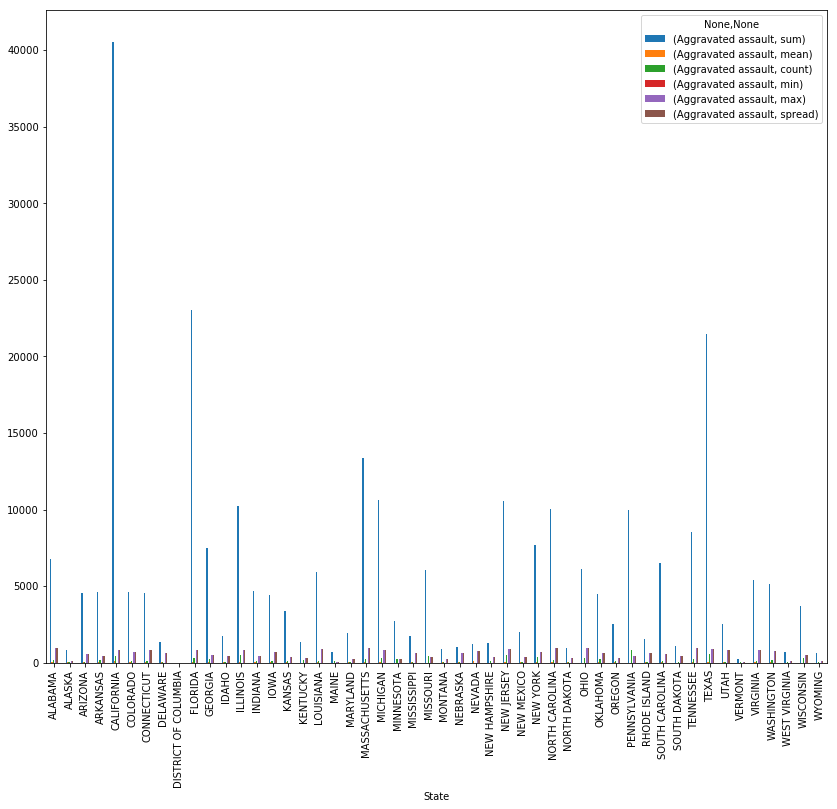

In [23]:
%matplotlib inline
usacrime_agraveted_assault.plot(kind='bar', figsize=(14, 12))